In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from my_functions import *
from Interaction_forces import *
from constants import *
from tqdm import tqdm

### *Initial Conditions*

##### *Simulating the cell size*
Vi benytter her at ved ligevægt rør cellevæggen hinanden så vores ligevægtsradius hedder:
$$
r_{ij}^* = \frac{\beta ln(\beta/S)}{\beta-1}
$$

### *The Euler simulation* 

In [2]:
def simulate_Steady_State(t_start, t_end, dt, points, beta=5, S=1):
    
    # Obtaining initial vals
    list_of_points = [points]
    t_list = [t_start]
    
    while t_start < t_end:
        # Calculate new forces
        forces = get_cell_forces(points, beta, S)

        # Update all locations
        new_points = points + forces * dt + gaussion_noise(len(points))
        points = new_points        
        
        # Update time step
        t_start += dt
        
        # Update lists
        list_of_points.append(points)  
        t_list.append(t_start)  
    
    return t_list, list_of_points

### *Animating the cell movement*

In [3]:
import matplotlib.animation as animation
from IPython.display import HTML

def get_data(i, list_of_points, t_list):
    """Function for generating the data in the animation"""
    points = list_of_points[i]
    t = t_list[i]
    return points, t

def update(i, list_of_points, t_list, axis):
    """
    Update function is what is happening every frame. Imagine that you have to make a new plot every frame,
    but instead you clear the background and overlay something else.
    """
    # Step 1 # Generate data
    points, t = get_data(i, list_of_points, t_list)

    # Step 2 # Clear previous plot and plot the updated plot
    axis.clear()          # Alternatively ax.clear() Clears the entire thing, but collections offers selection
    for i, point in enumerate(points):
        circle = plt.Circle((point[0], point[1]), r_cell, color = "blue", alpha = 0.2)
        axis.add_patch(circle)
        axis.scatter(point[0], point[1], marker=".", s = 8, color = "orange")

    # Step 3 # Modification of axis layout should occur in here
    axis.axis("equal")
    axis.set_xlim(screen_size)
    axis.set_ylim(screen_size)
    return None

### *Running the code*

In [4]:
# Consider plotting the voronoi diagram in the update function


#Generating the points
points = gen_points(n_points, R = 15)

# Runnning the euler simulation
time, All_points = simulate_Steady_State(t_start, t_end, dt, points, beta, S)
get_steady_state(All_points, "SteadyState_600cells.txt") # This is a function that saves the system when steady state is reached


MovieWriter Pillow unavailable; using Pillow instead.


KeyboardInterrupt: 

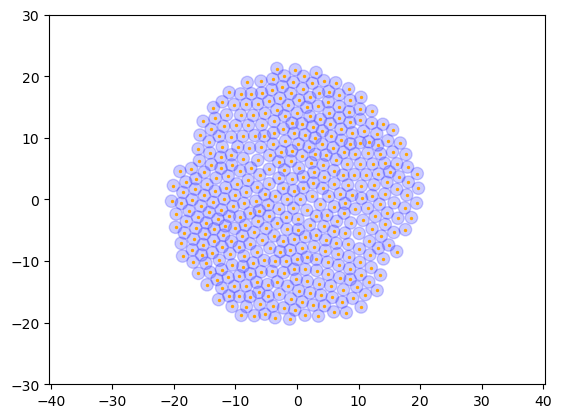

In [5]:

# Running the animation
fig, axis = plt.subplots()
anim = animation.FuncAnimation(fig, update, fargs=(All_points, time, axis), frames=150, interval=100) # Controls the plotted animation
plt.rcParams['animation.embed_limit'] = 2**128          # Limits the Bytes allocated to the animation
anim.save('Movement_with_voronoi_400cells.gif', writer='Pillow', fps=15)      # Controls the animation for the downloadable gif and saves it
plt.close(fig)

HTML(anim.to_jshtml())      # Converts anim to an actual gif